In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv(r'D:/VSCODE code/MTH 522 Code/Project 3/Processed_data.csv')
df.head()

C:\Users\devch\AppData\Local\Temp\ipykernel_14880\400017089.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:/VSCODE code/MTH 522 Code/Project 3/Processed_data.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier
0,I152049588,614,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,155.0,0,2015-06-15 00:01:00,2015,6,Monday,0,CONCORD SQ,42.341384,-71.078989,"(42.34138415, -71.07898883)",Tier 3
1,I152049593,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
2,I152049594,1874,DRUGS - OTHER,C11,289.0,0,2015-06-15 00:01:00,2015,6,Monday,0,HANCOCK ST,42.310434,-71.061340,"(42.31043400, -71.06134010)",Tier Drugs
3,I152049463,1402,VANDALISM,E18,493.0,0,2015-06-15 00:03:00,2015,6,Monday,0,LEXINGTON AVE,42.262551,-71.115822,"(42.26255067, -71.11582205)",Tier 4
4,I152049469,802,ASSAULT SIMPLE - BATTERY,D14,809.0,0,2015-06-15 00:45:00,2015,6,Monday,0,BAGNAL ST,42.359569,-71.135982,"(42.35956890, -71.13598188)",Tier 2


In [31]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format = 'ISO8601', utc=True)
df['Timestamp'] = pd.to_datetime(df['OCCURRED_ON_DATE'],format = 'ISO8601')

cutoff_date = pd.to_datetime('2023-10-31', utc=True)
cutoff_date2 = pd.to_datetime('2015-07-01', utc=True)

df = df[df['Timestamp']>= cutoff_date2].copy()
df = df[df['Timestamp']<= cutoff_date].copy()

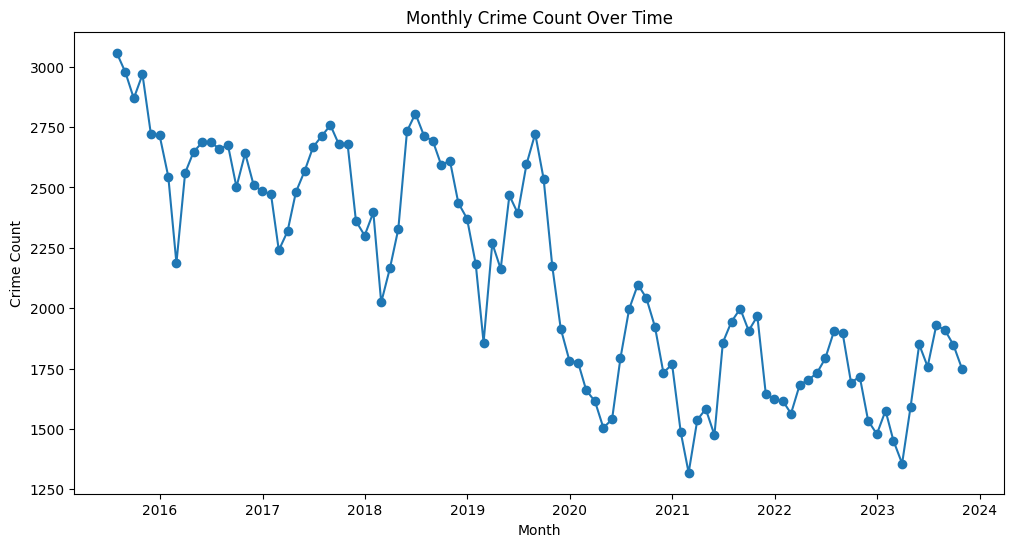

In [32]:
# Assuming your DataFrame is named 'crime_df'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc = True)
monthly_crime_count = df.resample('M', on='Timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_crime_count, marker='o')
plt.title('Monthly Crime Count Over Time')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier,Timestamp
1521,I152054215,1402,VANDALISM,C11,254.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,DORCHESTER AVE,42.307659,-71.058408,"(42.30765930, -71.05840850)",Tier 4,2015-07-01 00:00:00+00:00
1522,I152054217,801,ASSAULT - SIMPLE,E13,906.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,BICKFORD ST,42.325971,-71.101343,"(42.32597067, -71.10134303)",Tier 2,2015-07-01 00:00:00+00:00
1523,I152054244,614,LARCENY THEFT FROM MV - NON-ACCESSORY,A7,24.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,BROOKS ST,42.379283,-71.035363,"(42.37928285, -71.03536290)",Tier 3,2015-07-01 00:00:00+00:00
1524,I152054352,520,BURGLARY - RESIDENTIAL - FORCE,D4,159.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,UNION PARK,42.343443,-71.072141,"(42.34344338, -71.07214123)",Tier 3,2015-07-01 00:00:00+00:00
1525,I152060570,617,LARCENY THEFT FROM BUILDING,A1,87.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,SALUTATION ST,42.366116,-71.052049,"(42.36611638, -71.05204893)",Tier 3,2015-07-01 00:00:00+00:00


In [6]:
tier3 =[301, 301, 303, 304, 305,306, 307, 308, 309, 310, 311,312,313,314,315,316,317,318,319,320,321,322,323,324,333,334,335,336,337,
          338,339,340,341,342,343,344,345,346,347,348,349,350,352,353,354,355,356,357,358,359,360,361,362,363,364,373,374,375,376,377,
          378,379,380, 351, 361, 371, 381, 541, 540, 562, 561, 542, 521, 520, 522, 560,612,613,615, 617,614,618,616]

df3 = df[df['OFFENSE_CODE'].isin(tier3)].copy()
df3.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier,Timestamp
1523,I152054244,614,LARCENY THEFT FROM MV - NON-ACCESSORY,A7,24.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,BROOKS ST,42.379283,-71.035363,"(42.37928285, -71.03536290)",Tier 3,2015-07-01 00:00:00+00:00
1524,I152054352,520,BURGLARY - RESIDENTIAL - FORCE,D4,159.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,UNION PARK,42.343443,-71.072141,"(42.34344338, -71.07214123)",Tier 3,2015-07-01 00:00:00+00:00
1525,I152060570,617,LARCENY THEFT FROM BUILDING,A1,87.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,SALUTATION ST,42.366116,-71.052049,"(42.36611638, -71.05204893)",Tier 3,2015-07-01 00:00:00+00:00
1527,I152089209,617,LARCENY THEFT FROM BUILDING,C6,219.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,OLD HARBOR ST,42.332348,-71.047443,"(42.33234764, -71.04744300)",Tier 3,2015-07-01 00:00:00+00:00
1528,I162019013,617,LARCENY THEFT FROM BUILDING,A15,45.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,MEDFORD ST,42.380998,-71.062101,"(42.38099773, -71.06210065)",Tier 3,2015-07-01 00:00:00+00:00


In [7]:
df3['YEAR'].value_counts()

YEAR
2016    12768
2017    11952
2018    11672
2019    10561
2020     9868
2021     8397
2022     8212
2015     7694
2023     7226
Name: count, dtype: int64

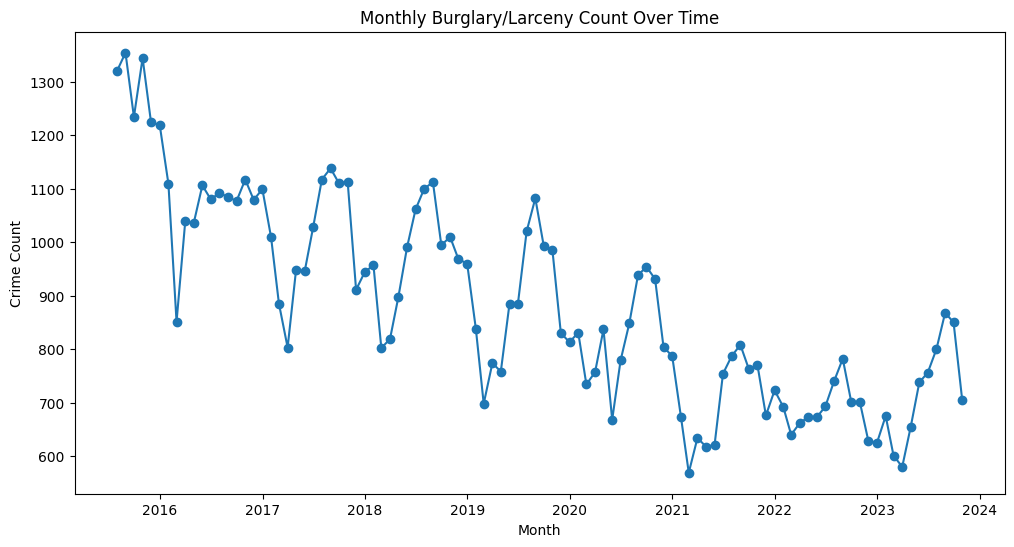

In [8]:
# Assuming your DataFrame is named 'crime_df'
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'], utc = True)
monthly_tier3crime_count = df3.resample('M', on='Timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_tier3crime_count, marker='o')
plt.title('Monthly Burglary/Larceny Count Over Time')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

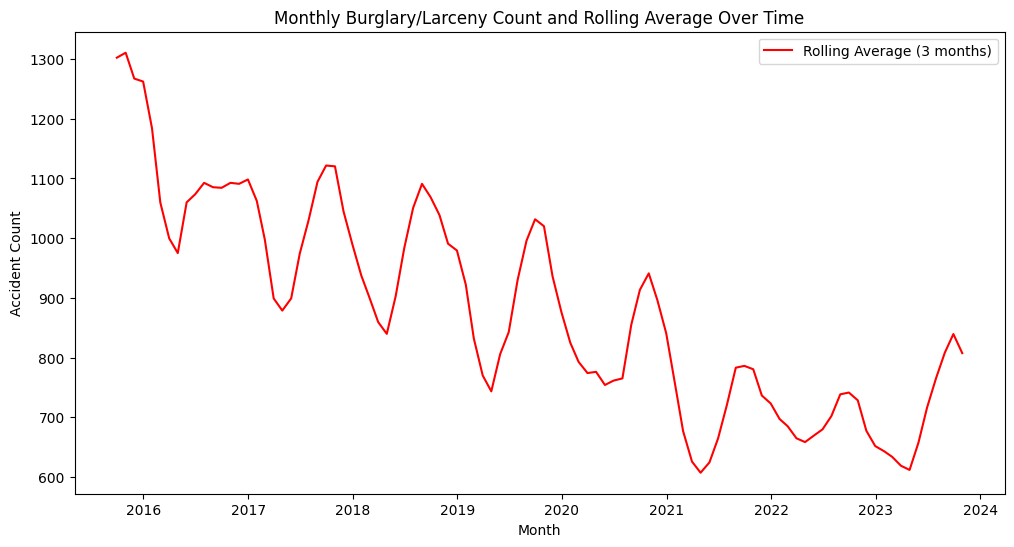

In [33]:
#Rolling average over a 3 month period

rolling_avg = monthly_tier3crime_count.rolling(window=3).mean()

# Plot the monthly accident count and the rolling average
plt.figure(figsize=(12, 6))
#plt.plot(monthly_accident_count, marker='o', label='Monthly Count')
plt.plot(rolling_avg, color='red', label='Rolling Average (3 months)')
plt.title('Monthly Burglary/Larceny Count and Rolling Average Over Time')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.legend()
plt.show()

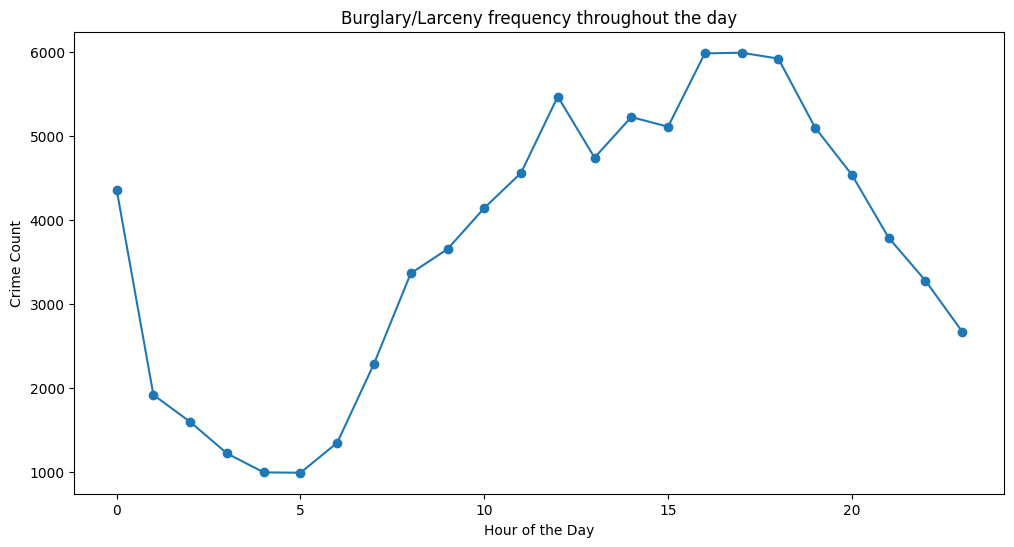

In [34]:
hourly_theft_count = df3.groupby('HOUR').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_theft_count, marker='o')
plt.title('Burglary/Larceny frequency throughout the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')
plt.show()

In [35]:
burglary_codes = [541, 540, 562, 561, 542, 521, 520, 522, 560, 520, 521, 522, 527, 510, 
            511, 512, 517, 540, 541, 542, 543, 547, 530, 531, 532, 537]

burglary = df[df['OFFENSE_CODE'].isin(burglary_codes)].copy()
burglary.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Tier,Timestamp
1524,I152054352,520,BURGLARY - RESIDENTIAL - FORCE,D4,159.0,0,2015-07-01 00:00:00+00:00,2015,7,Wednesday,0,UNION PARK,42.343443,-71.072141,"(42.34344338, -71.07214123)",Tier 3,2015-07-01 00:00:00+00:00
1530,I152057609,521,BURGLARY - RESIDENTIAL - ATTEMPT,E13,646.0,0,2015-07-01 00:01:00+00:00,2015,7,Wednesday,0,GREENOUGH AVE,42.310040,-71.114322,"(42.31004031, -71.11432217)",Tier 3,2015-07-01 00:01:00+00:00
1533,I152054241,522,BURGLARY - RESIDENTIAL - NO FORCE,A15,900.0,0,2015-07-01 03:00:00+00:00,2015,7,Wednesday,3,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)",Tier 3,2015-07-01 03:00:00+00:00
1538,I152054908,520,BURGLARY - RESIDENTIAL - FORCE,C11,460.0,0,2015-07-01 07:00:00+00:00,2015,7,Wednesday,7,STRATHCONA RD,42.305211,-71.079301,"(42.30521091, -71.07930130)",Tier 3,2015-07-01 07:00:00+00:00
1544,I152054304,520,BURGLARY - RESIDENTIAL - FORCE,E18,535.0,0,2015-07-01 09:30:00+00:00,2015,7,Wednesday,9,TURTLE POND PKWY,42.252752,-71.139285,"(42.25275215, -71.13928462)",Tier 3,2015-07-01 09:30:00+00:00


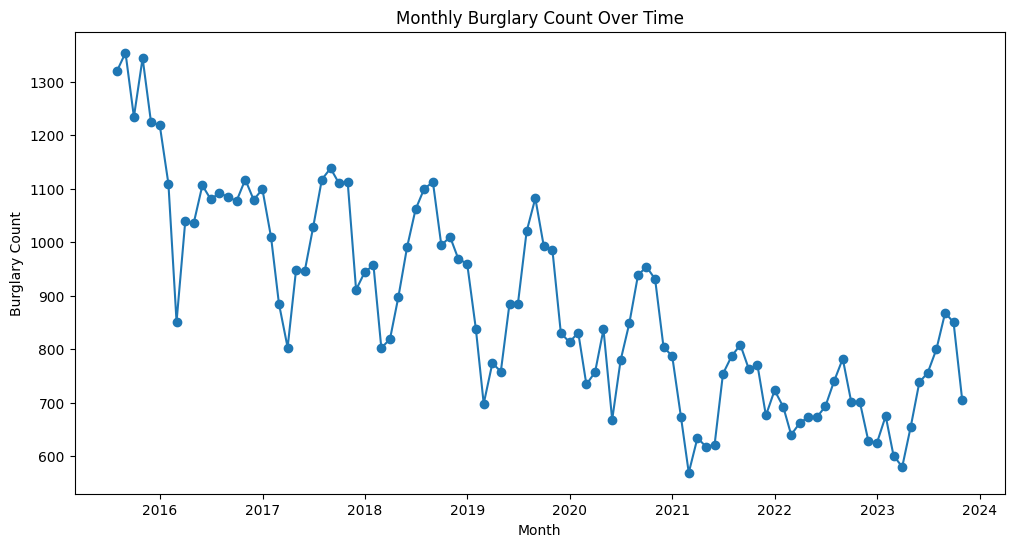

In [36]:
# Assuming your DataFrame is named 'crime_df'
burglary['Timestamp'] = pd.to_datetime(burglary['Timestamp'], utc = True)
monthly_burglary_count = df3.resample('M', on='Timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_burglary_count, marker='o')
plt.title('Monthly Burglary Count Over Time')
plt.xlabel('Month')
plt.ylabel('Burglary Count')
plt.show()

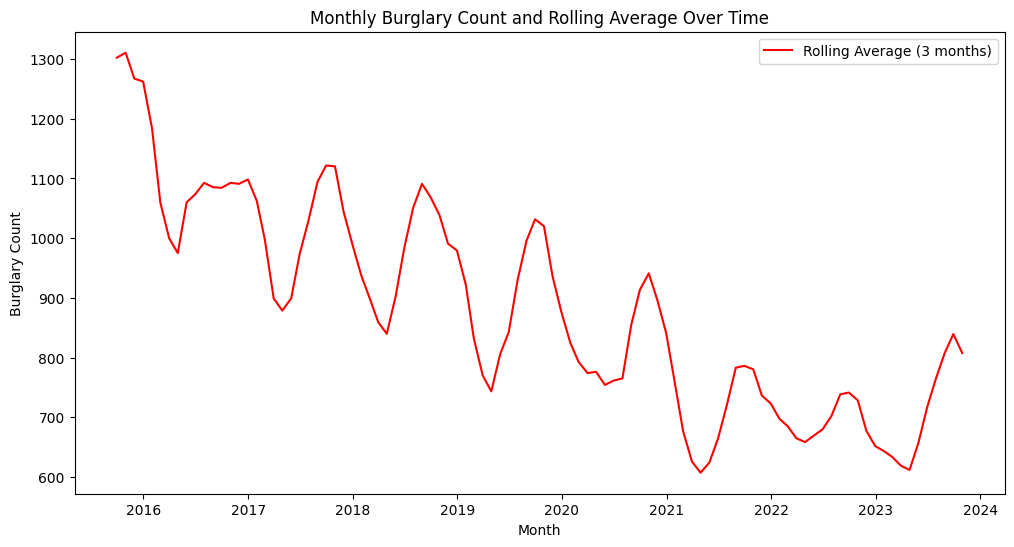

In [13]:
#Rolling average over a 3 month period
rolling_avg = monthly_burglary_count.rolling(window=3).mean()

# Plot the monthly accident count and the rolling average
plt.figure(figsize=(12, 6))
#plt.plot(monthly_accident_count, marker='o', label='Monthly Count')
plt.plot(rolling_avg, color='red', label='Rolling Average (3 months)')
plt.title('Monthly Burglary Count and Rolling Average Over Time')
plt.xlabel('Month')
plt.ylabel('Burglary Count')
plt.legend()
plt.show()

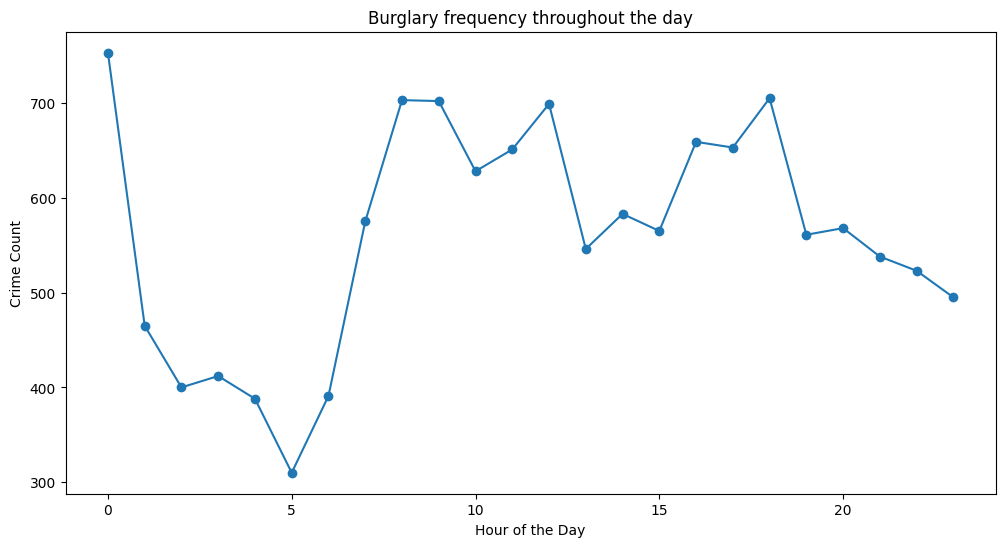

In [14]:
hourly_burglary_count = burglary.groupby('HOUR').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_burglary_count, marker='o')
plt.title('Burglary frequency throughout the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')
plt.show()

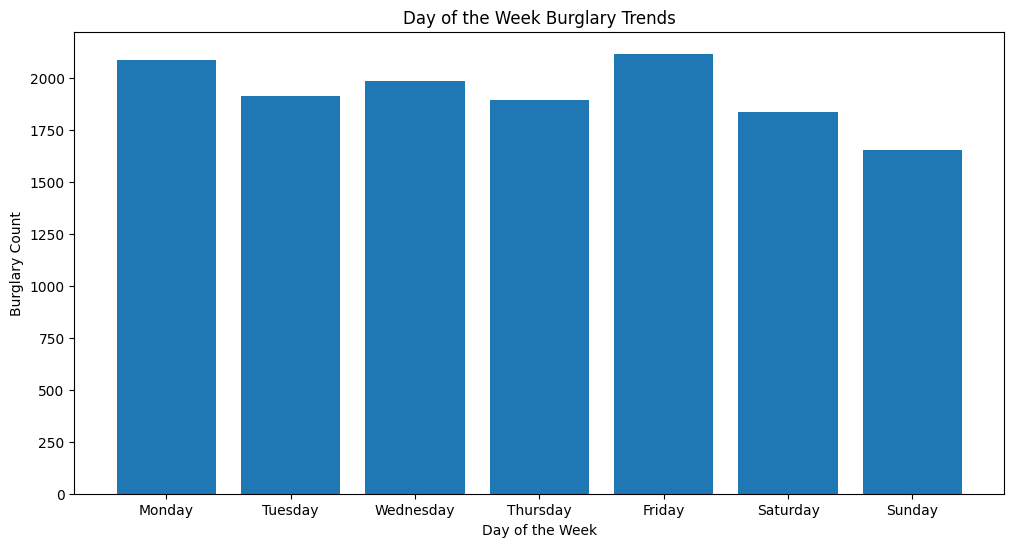

In [15]:
day_of_week_burglary_count = burglary.groupby('DAY_OF_WEEK').size()

# Reorder days of the week for better visualization
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_burglary_count = day_of_week_burglary_count.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.bar(day_of_week_burglary_count.index, day_of_week_burglary_count)
plt.title('Day of the Week Burglary Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Burglary Count')
plt.show()

---

## Models

### Exponential Smoothing

In [16]:
train_size = int(len(monthly_burglary_count) * 0.8)
train1, test1 = monthly_burglary_count[:train_size], monthly_burglary_count[train_size:]

In [17]:
# Exponential smoothing state space model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(train1, seasonal='add', seasonal_periods=12)
fitted_ets_model = ets_model.fit()
predictions_ets = fitted_ets_model.predict(start=len(train1), end=len(train1) + len(test1) - 1)

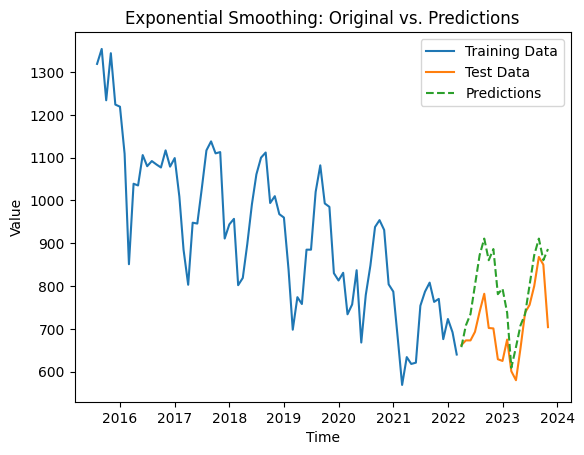

In [18]:
# Plotting the original time series
plt.plot(train1, label='Training Data')
plt.plot(test1, label='Test Data', linestyle='-')

# Plotting the predictions
plt.plot(predictions_ets, label='Predictions', linestyle='--')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing: Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

Predicting on rolling avg data

In [40]:
train_size = int(len(rolling_avg))
train1, test1 = rolling_avg[:train_size], rolling_avg[train_size:]

In [41]:
# Exponential smoothing state space model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(train1, seasonal='add', seasonal_periods=12)
fitted_ets_model1 = ets_model.fit()
predictions_ets1 = fitted_ets_model1.predict(start=len(train1), end=len(train1) + len(test1) - 1)

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ValueError: Prediction must have `end` after `start`.

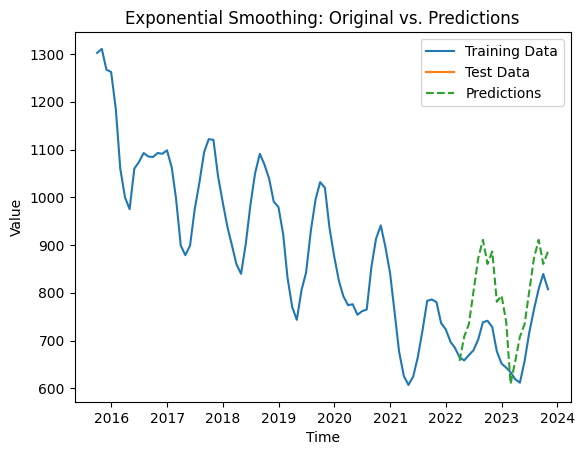

In [42]:
# Plotting the original time series
plt.plot(train1, label='Training Data')
plt.plot(test1, label='Test Data', linestyle='-')

# Plotting the predictions
plt.plot(predictions_ets, label='Predictions', linestyle='--')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing: Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test1, predictions_ets)
rmse = np.sqrt(mse)

print(f"Mean Squared error: {mse}")
print(f"Root mean squared error: {rmse}")

Mean Squared error: 10880.864348586596
Root mean squared error: 104.31138168285662


Predicting the future

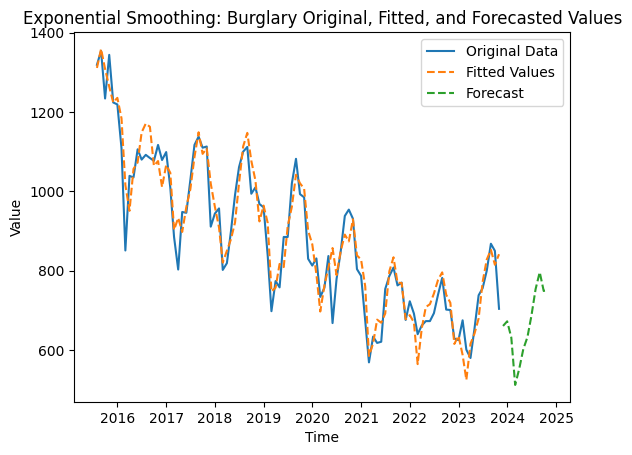

In [20]:
# Set the training size
train_size = int(len(monthly_burglary_count) )
train2 = monthly_burglary_count[:train_size]

# Exponential smoothing state space model
ets_model = ExponentialSmoothing(train2, seasonal='add', seasonal_periods=12)
fitted_ets_model = ets_model.fit()

# Forecast into the future
forecast_steps = 12  # Set the number of steps to forecast into the future
forecast = fitted_ets_model.forecast(steps=forecast_steps)

# Plotting the original time series
plt.plot(monthly_burglary_count, label='Original Data')

# Plotting the fitted values
plt.plot(fitted_ets_model.fittedvalues, label='Fitted Values', linestyle='--')

# Plotting the forecasted values
plt.plot(
    pd.date_range(start=monthly_burglary_count.index[-1], periods=forecast_steps + 1, freq='M')[1:],
    forecast,
    label='Forecast',
    linestyle='--'
)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing: Burglary Original, Fitted, and Forecasted Values')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

---

### Seasonal Decomposition

In [21]:
#Seasonal decomposition of time series data
from statsmodels.tsa.seasonal import STL

stl_model = STL(train1, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid


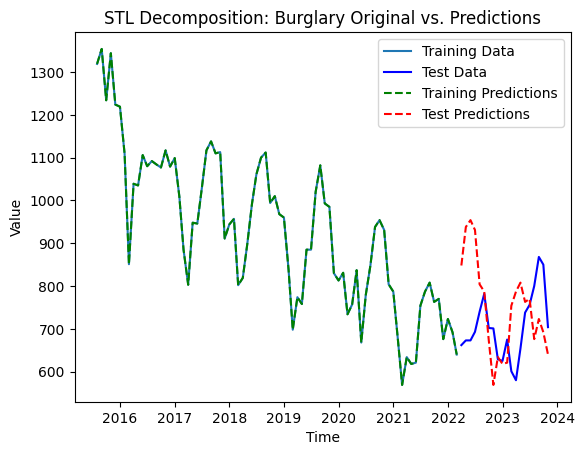

In [22]:
# Combine the components for training data
train_pred = seasonal + trend + resid

# Forecasting using the seasonal, trend, and residual components for the test set
test_pred = seasonal[-len(test1):] + trend[-len(test1):] + resid[-len(test1):]

# Plotting the original time series
plt.plot(train1, label='Training Data')
plt.plot(test1, label='Test Data', linestyle='-', color='blue')

# Plotting the predictions
plt.plot(train_pred, label='Training Predictions', linestyle='--', color='green')
plt.plot(test1.index, test_pred, label='Test Predictions', linestyle='--', color = 'red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Burglary Original vs. Predictions')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

Forecasting into the future

C:\Users\devch\AppData\Local\Temp\ipykernel_14880\490697563.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_seasonal = stl_result.seasonal[-1] + np.arange(1, forecast_steps + 1)
C:\Users\devch\AppData\Local\Temp\ipykernel_14880\490697563.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_trend = stl_result.trend[-1] + np.arange(1, forecast_steps + 1)
C:\Users\devch\AppData\Local\Temp\ipykernel_14880\490697563.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

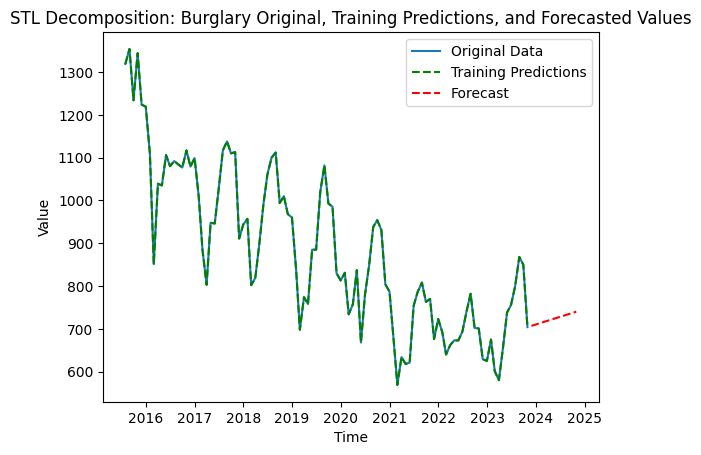

In [23]:

# Set the training size
train_size = int(len(monthly_burglary_count))
train3 = monthly_burglary_count[:train_size]
test3 = monthly_burglary_count[train_size:]

# Seasonal decomposition of time series data
stl_model = STL(train3, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid

# Combine the components for training data
train_pred = seasonal + trend + resid

# Forecasting into the future
forecast_steps = 12  # Set the number of steps to forecast into the future

# Manually predict the future seasonal component
forecast_seasonal = stl_result.seasonal[-1] + np.arange(1, forecast_steps + 1)

# Manually predict the future trend component
forecast_trend = stl_result.trend[-1] + np.arange(1, forecast_steps + 1)

# Manually predict the future residual component
forecast_resid = stl_result.resid[-1] + np.arange(1, forecast_steps + 1)

# Combine the components for forecasting into the future
forecast_pred = forecast_seasonal + forecast_trend + forecast_resid

# Plotting the original time series
plt.plot(monthly_burglary_count, label='Original Data')

# Plotting the fitted values
plt.plot(train3.index, train_pred, label='Training Predictions', linestyle='--', color='green')

# Plotting the forecasted values
plt.plot(pd.date_range(start=train3.index[-1], periods=forecast_steps + 1, freq='M')[1:],
         forecast_pred,
         label='Forecast',
         linestyle='--',
         color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Burglary Original, Training Predictions, and Forecasted Values')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


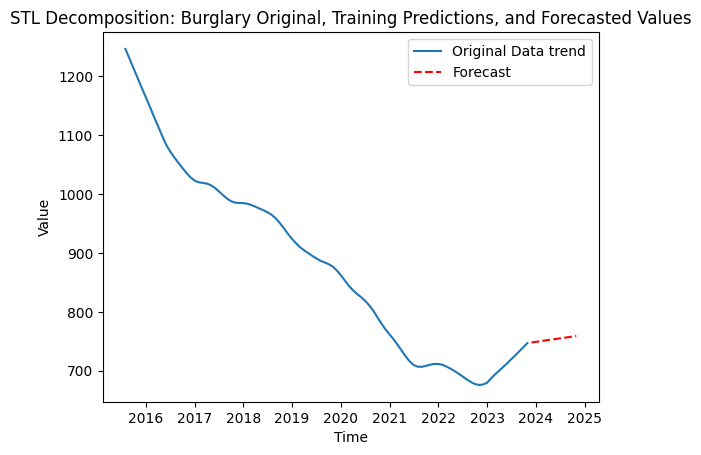

In [28]:
# Plotting the original time series
plt.plot(trend, label='Original Data trend')

# Plotting the fitted values
#plt.plot(train3.index, train_pred, label='Training Predictions', linestyle='--', color='green')

# Plotting the forecasted values
plt.plot(pd.date_range(start=train3.index[-1], periods=forecast_steps + 1, freq='M')[1:],
         forecast_trend,
         label='Forecast',
         linestyle='--',
         color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('STL Decomposition: Burglary Original, Training Predictions, and Forecasted Values')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

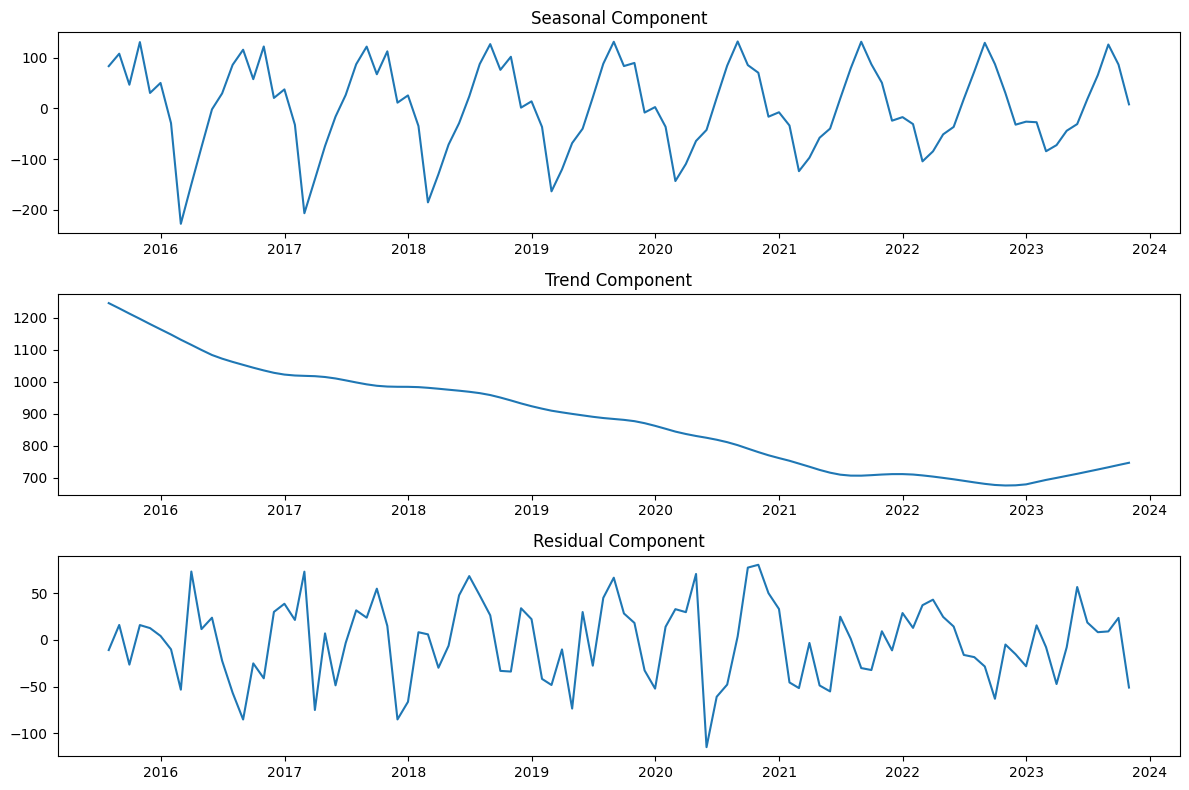

In [25]:
# Seasonal decomposition of time series data
stl_model = STL(train3, seasonal=13)
stl_result = stl_model.fit()
seasonal, trend, resid = stl_result.seasonal, stl_result.trend, stl_result.resid

# Plotting the components separately
plt.figure(figsize=(12, 8))

# Plotting the seasonal component
plt.subplot(3, 1, 1)
plt.plot(seasonal)
plt.title('Seasonal Component')

# Plotting the trend component
plt.subplot(3, 1, 2)
plt.plot(trend)
plt.title('Trend Component')

# Plotting the residual component
plt.subplot(3, 1, 3)
plt.plot(resid)
plt.title('Residual Component')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

---

## SARIMAX

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


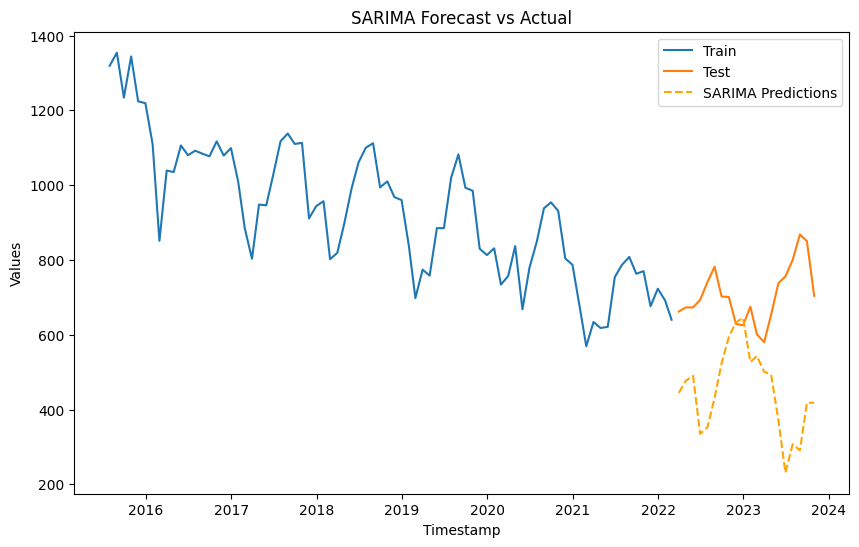

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the time series into training and test sets
train_size = int(len(monthly_tier3crime_count) * 0.8)
train, test = monthly_tier3crime_count[:train_size], monthly_tier3crime_count[train_size:]

# Define and fit the SARIMA model
order = (1, 1, 1)  # Replace with your chosen order (p, d, q)
seasonal_order = (1, 1, 1, 52)  # Replace with your chosen seasonal order (P, D, Q, m)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

# Make predictions on the test set
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_mean, label='SARIMA Predictions', linestyle='--', color='orange')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

c:\Users\devch\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


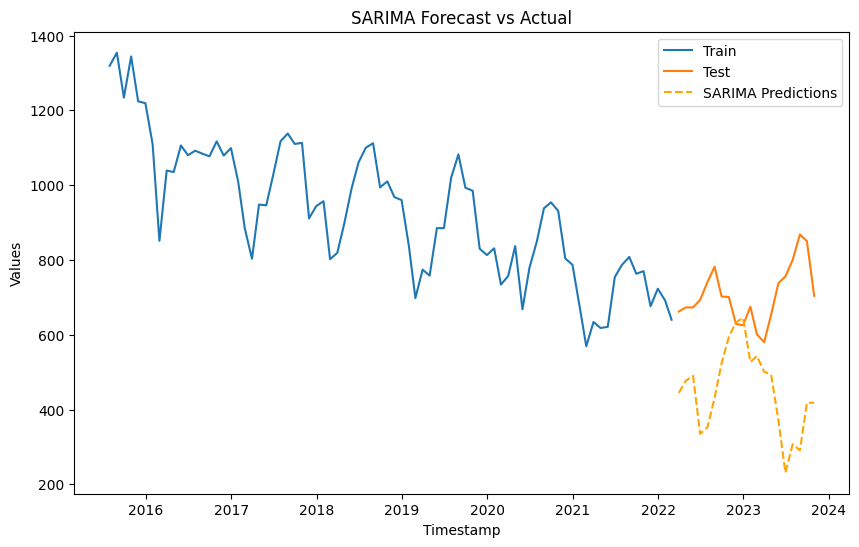

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the time series into training and test sets
train_size = int(len(monthly_burglary_count) * 0.8)
train, test = monthly_burglary_count[:train_size], monthly_burglary_count[train_size:]

# Define and fit the SARIMA model
order = (1, 1, 1)  # Replace with your chosen order (p, d, q)
seasonal_order = (1, 1, 1, 52)  # Replace with your chosen seasonal order (P, D, Q, m)
model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

# Make predictions on the test set
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_mean, label='SARIMA Predictions', linestyle='--', color='orange')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

### Tier List

**Tier 1:** Violent crimes - Murder, Manslaughter, Rape, 

Related Codes - 111, 123, 121, 244, 241, 243, 251, 261, 252, 253, 271, 254, 242, 

**Tier 2 :** Arson (900-930), Aggravated Assault/ Battery (401-433)

Related codes - 900-930; 401-433 ; 802, 423, 413, 801

**Tier 3:** Non violent crimes - Larceny, Robbery (301-380), burglary, B&E - (510 - 547)

Related codes - 612,613,615, 617,614,618,616; 301, 311, 351, 361, 371, 381; 541, 540, 562, 561, 542, 521, 520, 522, 560; 

**Tier Drugs:** 1874,1842,1841,1849,1848,1858,1855,1864,1863,1866,1868,1843,3023,3021,1875,3022,1847,1840,1873,1848,1850

**Tier 4:** Vandalism (1402, 1415), Vehicular Accidents -  3801, 3802,3803,3810,3807,3805